# Microsoft Movie Analysis

**Author:** Kimberly Dickson
***

![title](images/diverse_audience.jpg)

iStock logo

## Overview
This research has been developed to help Microsoft determine the profitability of entering the movie industry.  The goal is to perform an EDA (Exploratory Data Analysis) model comparing the audience by generation to identify the movie releases that made the most revenue.  This will help Microsoft determine the type of movie to make based on a targeted audience. The analysis will consist of the top 10 movies budget, ratings, and genre.  This analysis is to get a sense of how movie tastes differ by age.  The data comes from IMDB movies and ratings csv files.  

##  Business Problem

Designing an Audience Based Marketing Strategy

Microsoft will need to understand the type of film they wish to make for example identifying the product, genre, production cost, value etc.  In other words the film package and look at the customers wants, needs and demands to identify a potential market for their film.
***

## Data Understanding
***
Before I got started, I installed the various libraries needed.  Next I downloaded the 11 csv datasets that was provided by the instructor to determine what type of analysis I would provide to Microsoft. The data represented movies and certain attributes that help determine which movies make the most at the boxoffice.  I wanted to see how does the different generations rated the movies based off the genre and how it changed over the last 10 years.


***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as mcolors
import seaborn as sns
sns.set()

import sqlite3

import random

from IPython.display import Image 
from pandas import Series, DataFrame
from matplotlib.pyplot import show,figure,subplot
from matplotlib import dates as dates 

## Preparing the Data

## The Datasets

***
The csv files included 11 related datasets as shown below.  After I reviewed all the datasets, I decided I needed the IMDB_ratings and IMDB_movies data.  IMDB ratings data had additional data which included ratings based on age groups and that was important for my hypothesis.  I also added the IMDB movies datasets so I could use the imdb_title_id to merge the two tables for my analysis without possibly jeopardizing the integrity of the data.
***

In [2]:
bm = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
name = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
title_akas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
title_basics = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
title_ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
rt_movies = pd.read_csv('data/zippedData/rotten_tomatoes_movies.csv.gz')
tmdb_movies = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
tn_movie_budgets  = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

ratings = pd.read_csv('data/zippedData/IMDB_ratings.csv.zip')
movies = pd.read_csv('data/zippedData/IMDB_movies.csv.zip')

C:\Users\Lookupkim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


*** 
I began cleaning the two datasets by using the info() function, checking for null values, looking at a sample of the data, and merging the two tables, This will set me up to start analyzing the data.
***

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   weighted_average_vote      85855 non-null  float64
 2   total_votes                85855 non-null  int64  
 3   mean_vote                  85855 non-null  float64
 4   median_vote                85855 non-null  float64
 5   votes_10                   85855 non-null  int64  
 6   votes_9                    85855 non-null  int64  
 7   votes_8                    85855 non-null  int64  
 8   votes_7                    85855 non-null  int64  
 9   votes_6                    85855 non-null  int64  
 10  votes_5                    85855 non-null  int64  
 11  votes_4                    85855 non-null  int64  
 12  votes_3                    85855 non-null  int64  
 13  votes_2                    85855 non-null  int

In [4]:
ratings.isnull().sum()

imdb_title_id                    0
weighted_average_vote            0
total_votes                      0
mean_vote                        0
median_vote                      0
votes_10                         0
votes_9                          0
votes_8                          0
votes_7                          0
votes_6                          0
votes_5                          0
votes_4                          0
votes_3                          0
votes_2                          0
votes_1                          0
allgenders_0age_avg_vote     52496
allgenders_0age_votes        52496
allgenders_18age_avg_vote      706
allgenders_18age_votes         706
allgenders_30age_avg_vote       10
allgenders_30age_votes          10
allgenders_45age_avg_vote       80
allgenders_45age_votes          80
males_allages_avg_vote           1
males_allages_votes              1
males_0age_avg_vote          58444
males_0age_votes             58444
males_18age_avg_vote          1465
males_18age_votes   

In [5]:
ratings.sample(20)

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
78817,tt5832544,6.5,1930,7.1,8.0,672,203,182,217,141,...,5.1,14.0,7.0,2.0,6.1,12.0,6.1,189.0,6.0,479.0
82085,tt7219324,6.5,1375,6.6,7.0,58,73,234,426,328,...,6.7,66.0,6.6,60.0,6.1,42.0,6.7,76.0,6.5,820.0
37537,tt0235424,3.5,107,4.1,3.0,10,1,4,7,6,...,4.0,4.0,4.0,3.0,3.1,12.0,3.5,45.0,3.3,40.0
43868,tt0371282,4.6,115,5.4,5.0,28,3,3,2,8,...,6.7,6.0,5.5,4.0,4.6,10.0,4.2,75.0,5.8,17.0
45233,tt0402063,5.9,411,6.3,6.0,73,26,44,59,61,...,7.1,24.0,6.0,11.0,4.7,13.0,5.9,58.0,5.9,265.0
50921,tt0864911,5.4,224,5.5,6.0,9,2,11,42,52,...,5.6,21.0,4.3,3.0,4.5,13.0,5.4,7.0,5.4,179.0
12942,tt0061401,5.6,952,5.9,6.0,96,31,82,137,200,...,5.8,23.0,6.1,53.0,5.3,106.0,5.6,335.0,5.6,351.0
29045,tt0113540,7.1,71729,7.1,7.0,7427,7728,16514,19338,9970,...,7.0,6138.0,6.7,936.0,6.3,391.0,7.1,17141.0,7.0,32720.0
75526,tt4706888,4.4,3681,5.4,5.0,772,143,150,281,400,...,4.1,34.0,6.0,10.0,4.2,44.0,4.5,250.0,4.2,1141.0
43145,tt0354149,6.0,103,6.1,6.0,5,2,7,26,32,...,7.0,2.0,NaN,NaN,NaN,NaN,6.5,6.0,5.9,55.0


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          85855 non-null  object 
 1   title                  85855 non-null  object 
 2   original_title         85855 non-null  object 
 3   year                   85855 non-null  object 
 4   date_published         85855 non-null  object 
 5   genre                  85855 non-null  object 
 6   duration               85855 non-null  int64  
 7   country                85791 non-null  object 
 8   language               85022 non-null  object 
 9   director               85768 non-null  object 
 10  writer                 84283 non-null  object 
 11  production_company     81400 non-null  object 
 12  actors                 85786 non-null  object 
 13  description            83740 non-null  object 
 14  avg_vote               85855 non-null  float64
 15  vo

In [7]:
movies.isnull().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [8]:
movies.sample(20)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
56917,tt1320297,Si può fare,Si può fare,2008,2008-10-31,Comedy,111,Italy,Italian,Giulio Manfredonia,...,"Claudio Bisio, Anita Caprioli, Giuseppe Battis...",Set in Italy in the early 1980s the film follo...,7.6,1561,EUR 5280000,NaN,$ 2771968,NaN,2.0,14.0
47897,tt0463960,Coppia diabolica,The Devil You Know,2013,2013-07-09,"Mystery, Thriller",76,USA,English,James Oakley,...,"Rosamund Pike, Lena Olin, Dean Winters, Molly ...",The daughter of once famous actress is faced w...,3.4,1587,$ 3000000,NaN,NaN,NaN,7.0,8.0
83429,tt7923220,Inheritance,Inheritance,2020,2020-05-22,"Drama, Mystery, Thriller",111,USA,English,Vaughn Stein,...,"Lily Collins, Simon Pegg, Connie Nielsen, Chac...",A patriarch of a wealthy and powerful family s...,5.5,4581,NaN,NaN,$ 222180,31.0,102.0,51.0
1324,tt0023049,Se avessi un milione,If I Had a Million,1932,1933-09-19,"Comedy, Drama",88,USA,English,"James Cruze, H. Bruce Humberstone",...,"Gary Cooper, Charles Laughton, George Raft, Ja...",A dying tycoon gives million-dollar windfalls ...,7.0,1566,NaN,NaN,NaN,NaN,40.0,9.0
68164,tt2638144,Ben-Hur,Ben-Hur,2016,2016-09-29,"Action, Adventure, Drama",123,USA,"English, Persian, Greek, Arabic, Latin",Timur Bekmambetov,...,"Jack Huston, Toby Kebbell, Rodrigo Santoro, Na...","Judah Ben-Hur, a prince falsely accused of tre...",5.7,40859,$ 100000000,$ 26410477,$ 94061311,38.0,265.0,229.0
43203,tt0355857,Onmyôji,Onmyôji,2001,2001-10-06,"Action, Drama, Fantasy",112,Japan,Japanese,Yôjirô Takita,...,"Mansai Nomura, Hideaki Itô, Eriko Imai, Yui Na...","When samurai Hiromasa comes to Seimei, Kyoto's...",6.3,1269,NaN,$ 16234,$ 16234,53.0,23.0,10.0
67868,tt2570436,Army of the Damned,Army of the Damned,2013,2013-12-03,Horror,85,USA,NaN,Tom DeNucci,...,"Tony Todd, Michael Berryman, Jackie Moore, Dav...",The filming of a hit reality TV show goes horr...,3.8,440,$ 1200000,NaN,NaN,NaN,16.0,14.0
70137,tt3165264,Altered Perception,Altered Perception,2017,2018-05-04,"Fantasy, Mystery, Sci-Fi",79,USA,English,Kate Rees Davies,...,"Jon Huertas, Jennifer Blanc-Biehn, Mark Burnha...",A drug that alters perceptions during trauma a...,2.8,169,NaN,$ 1259,$ 1259,NaN,3.0,10.0
60929,tt1693110,Showgirls 2: Penny's from Heaven,Showgirls 2: Penny's from Heaven,2011,2012-06-02,"Comedy, Drama, Thriller",145,USA,English,Rena Riffel,...,"Rena Riffel, Glenn Plummer, Greg Travis, Dewey...","Las Vegas stripper, Penny Slot (",1.7,493,$ 30000,NaN,NaN,NaN,13.0,16.0
36734,tt0214728,Gong yuan 2000 AD,Gong yuan 2000 AD,2000,2000-02-03,"Action, Thriller",109,"Hong Kong, Singapore","English, Mandarin, Cantonese",Gordon Chan,...,"Aaron Kwok, Phyllis Quek, James Lye, Daniel Wu...",The Y2K Bug. Real Warfare vs Electronic Gaming...,5.9,628,SGD 6300000,NaN,NaN,NaN,15.0,26.0


In [9]:
movies_ratings = pd.merge(movies, ratings, on='imdb_title_id')
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85855 entries, 0 to 85854
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85855 non-null  object 
 1   title                      85855 non-null  object 
 2   original_title             85855 non-null  object 
 3   year                       85855 non-null  object 
 4   date_published             85855 non-null  object 
 5   genre                      85855 non-null  object 
 6   duration                   85855 non-null  int64  
 7   country                    85791 non-null  object 
 8   language                   85022 non-null  object 
 9   director                   85768 non-null  object 
 10  writer                     84283 non-null  object 
 11  production_company         81400 non-null  object 
 12  actors                     85786 non-null  object 
 13  description                83740 non-null  obj

*** 
The movies and ratings datasets both includes 85,855 movies.  The movies dataset had addition information such as the average rating, budget and the gross income worldwild.

The ratings dataset had additional information such as the voters based off age groups broken down by gender.

I will be exploring both as we go. Therefore, I merged the datasets and name the data "movies_ratings".  I started reviewing the data and found some interesting observations. For example, the columns are objects, integers and floats, I turned the 'year' column into an integer, I also limited the analysis for the years of 2010 - 2019 since 2020 had limited data.

***

In [10]:
movies_ratings['year'] = movies_ratings.year.astype('str')
movies_ratings['year'] = movies_ratings.year.str.strip()

In [11]:
movies_ratings[movies_ratings['year'].isnull()]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes


In [12]:
movies_ratings.year[movies_ratings.year=='TV Movie 2019'] = 2019
movies_ratings



<ipython-input-12-b7aba488044f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ratings.year[movies_ratings.year=='TV Movie 2019'] = 2019


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [13]:
movies_ratings['year'] = movies_ratings.year.astype('int')

In [14]:
movies_ratings.sample(20)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
52800,tt1034305,Don't Look Up,Don't Look Up,2009,2011-01-08,Horror,85,"USA, Japan, South Africa","English, Romanian",Fruit Chan,...,3.0,153.0,3.3,63.0,2.9,65.0,3.4,379.0,2.9,802.0
45256,tt0402595,Ya lyublyu tebya,Ya lyublyu tebya,2004,2005-02-23,"Comedy, Romance",86,Russia,"Russian, English, Kalmyk-Oirat","Olga Stolpovskaja, Dmitriy Troitskiy",...,6.3,82.0,5.8,24.0,5.2,22.0,6.1,162.0,6.1,515.0
70467,tt3243554,Four Corners,Four Corners,2013,2014-03-28,"Crime, Thriller",119,South Africa,"Afrikaans, English",Ian Gabriel,...,7.5,29.0,5.9,13.0,6.2,8.0,6.9,12.0,6.3,200.0
11141,tt0056144,Kiru,Kiru,1962,1962-07-01,"Action, Drama",71,Japan,Japanese,Kenji Misumi,...,6.8,9.0,6.3,11.0,5.8,37.0,7.4,37.0,7.1,239.0
38055,tt0246339,Yamudiki Mogudu,Yamudiki Mogudu,1988,1988-04-29,"Action, Comedy, Fantasy",145,India,Telugu,Ravi Raja Pinisetty,...,4.0,2.0,4.7,3.0,3.4,16.0,7.2,29.0,6.8,118.0
17424,tt0074423,La donna della domenica,La donna della domenica,1975,1976-04-14,"Comedy, Crime, Mystery",105,"Italy, France","English, Latin, Italian",Luigi Comencini,...,7.0,17.0,6.9,29.0,6.5,69.0,6.2,53.0,6.6,504.0
78172,tt5612576,Il padre d'Italia,Il padre d'Italia,2017,2017-03-09,Drama,92,Italy,Italian,Fabio Mollo,...,6.6,51.0,6.2,17.0,6.6,8.0,5.1,33.0,6.4,294.0
79861,tt6175402,Feedback,Feedback,2017,2017-01-13,"Comedy, Drama, Thriller",108,USA,English,Derek Owen,...,NaN,NaN,NaN,NaN,10.0,2.0,10.0,2.0,4.0,3.0
49947,tt0800080,L'incredibile Hulk,The Incredible Hulk,2008,2008-06-18,"Action, Adventure, Sci-Fi",112,USA,"English, Portuguese, Spanish",Louis Leterrier,...,6.6,20292.0,6.7,4028.0,6.6,780.0,6.9,73385.0,6.6,191998.0
55546,tt1217613,World Invasion,Battle Los Angeles,2011,2011-04-22,"Action, Sci-Fi",116,USA,"English, Ukrainian",Jonathan Liebesman,...,5.6,7059.0,5.9,2065.0,5.5,569.0,6.0,31271.0,5.6,90399.0


***
# The dataset is now ready for me to start visualizing the data.  

***
# Top 10 Movie Genres
I started exploring the top 10 movie genres and movies produced after 2010.

As you will see, out of the 10 top genres, the Drama genre have over 40% subsequently more movies produced than Comedy which can second.  Afterwards, the genres produced tended to overlap each other, with Comedy, Drama and Romance leading the group.  Surprisingly, Action was 10th of the top 10 genres.
***

In [15]:
df_genres = movies_ratings[['genre','title']].groupby(['genre']).count().reset_index().rename(columns={'title':'number_of_movies'})

df_genres = df_genres.sort_values(by='number_of_movies', ascending=False)
df_genres

,genre,number_of_movies
701,Drama,12543
467,Comedy,7693
495,"Comedy, Drama",4039
823,"Drama, Romance",3455
581,"Comedy, Romance",2508
...,...,...
716,"Drama, Adventure, Horror",1
714,"Drama, Adventure, Comedy",1
711,"Drama, Action, War",1
708,"Drama, Action, Musical",1


In [16]:
df_genres_top10 = df_genres.iloc[:10]
df_genres_top10

,genre,number_of_movies
701,Drama,12543
467,Comedy,7693
495,"Comedy, Drama",4039
823,"Drama, Romance",3455
581,"Comedy, Romance",2508
505,"Comedy, Drama, Romance",2293
1009,Horror,2268
847,"Drama, Thriller",1348
623,"Crime, Drama",1343
50,"Action, Crime, Drama",1310


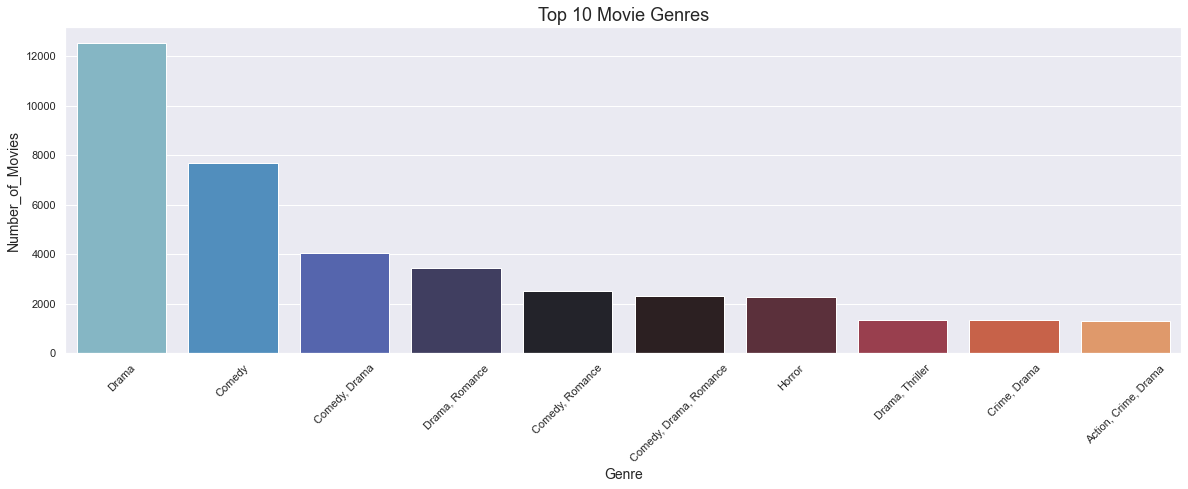

<Figure size 432x288 with 0 Axes>

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.barplot(x = df_genres_top10['genre'],
            y = df_genres_top10['number_of_movies'], palette='icefire',)
           

plt.xticks(rotation=45)

plt.xlabel('Genre', size = 14)
plt.ylabel('Number_of_Movies', size = 14)
plt.title('Top 10 Movie Genres', size = 18)
plt.show()
plt.savefig("Top 10 Movie Genres.jpg")

In [18]:
df_years = movies_ratings[['year','title', 'genre']].groupby(['year','genre']).count().reset_index().rename(columns={'title':'number_of_movies'})
df_years

,year,genre,number_of_movies
0,1894,Romance,1
1,1906,"Biography, Crime, Drama",1
2,1911,"Adventure, Drama, Fantasy",1
3,1911,Drama,1
4,1911,"Drama, War",1
...,...,...,...
17199,2020,"Sci-Fi, Thriller",2
17200,2020,Sport,1
17201,2020,Thriller,37
17202,2020,War,3


In [19]:
df_years = df_years.sort_values(by=['number_of_movies'], ascending=False)
df_years

,year,genre,number_of_movies
16329,2017,Drama,531
16655,2018,Drama,518
16942,2019,Drama,461
16028,2016,Drama,447
14816,2012,Drama,441
...,...,...,...
5015,1967,"Action, Sport",1
5013,1967,"Action, Drama, Western",1
5010,1967,"Action, Drama, Musical",1
5009,1967,"Action, Drama, History",1


In [20]:
df_years_2010 = df_years 
df_years_2010

,year,genre,number_of_movies
16329,2017,Drama,531
16655,2018,Drama,518
16942,2019,Drama,461
16028,2016,Drama,447
14816,2012,Drama,441
...,...,...,...
5015,1967,"Action, Sport",1
5013,1967,"Action, Drama, Western",1
5010,1967,"Action, Drama, Musical",1
5009,1967,"Action, Drama, History",1


In [21]:
df_years_2010 = df_years_2010[df_years_2010['year'] >= 2010][df_years_2010['number_of_movies'] >= 50]
df_years_2010

<ipython-input-21-6593ecff3105>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_years_2010 = df_years_2010[df_years_2010['year'] >= 2010][df_years_2010['number_of_movies'] >= 50]


,year,genre,number_of_movies
16329,2017,Drama,531
16655,2018,Drama,518
16942,2019,Drama,461
16028,2016,Drama,447
14816,2012,Drama,441
...,...,...,...
14862,2012,"Drama, Thriller",53
15823,2015,Thriller,53
14574,2011,"Drama, Thriller",51
16985,2019,"Drama, Thriller",50


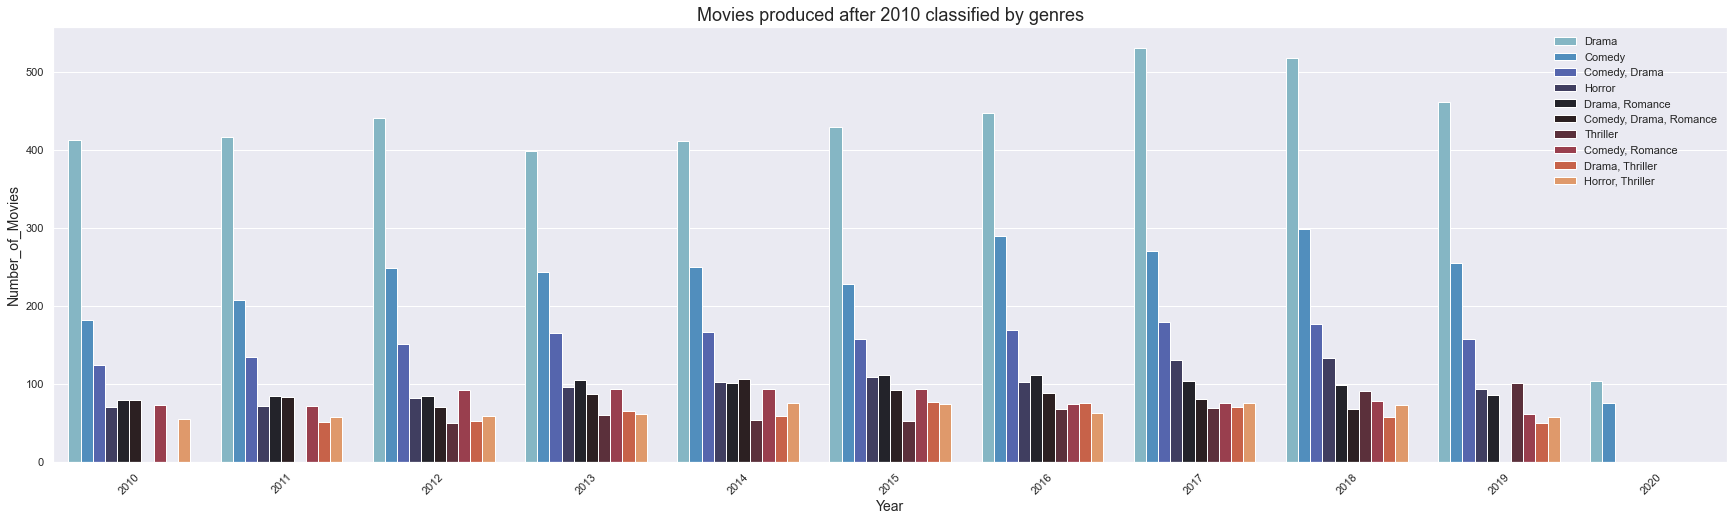

<Figure size 432x288 with 0 Axes>

In [22]:
fig, ax = plt.subplots(figsize=(30, 8))

sns.barplot(x = df_years_2010['year'],
            y = df_years_2010['number_of_movies'],
            hue = df_years_2010['genre'], palette='icefire', edgecolor = 'w',)
           

plt.xticks(rotation=45)

plt.xlabel('Year', size = 14)
plt.ylabel('Number_of_Movies', size = 14)
plt.title('Movies produced after 2010 classified by genres', size = 18)
ax.legend(loc='upper right', frameon=False)
plt.show()
plt.savefig("Movies produced after 2010 classified by genres.jpg")


***
## I took a look over the last 10 years to see the precentage of ratings for male vs female voters.  2020 is excluded due to lack of data.


I created a couple of DataFrames identifying the movies produced and how each generation voted per gender.  

I took the total number of all Male and Female voters, Generation X voters, Millennials, and Generation Z voters.
    
From the analysis, In 2010 males voted over 60% more times than females.  There votes peaked in 2013 however, over the years the total of votes began to decline.  I am also seeing that the female votes are steadier than the male votes.  The male votes have been declining over the last 5 years by around 50%. 

    
***

In [23]:
df_male_female_t = movies_ratings[movies_ratings.year >= 2010]
df_male_female_t = df_male_female_t[df_male_female_t.year < 2020] #excludes 2020 
df_male_female_t = df_male_female_t[['year','title', 'males_allages_votes', 'females_allages_votes']].groupby(['year']).sum().reset_index()
df_male_female_t = df_male_female_t.rename(columns={'males_allages_votes':'males_total_votes'})
df_male_female_t = df_male_female_t.rename(columns={'females_allages_votes':'females_total_votes'})
df_male_female_t = df_male_female_t.iloc[:10]
df_male_female_t

,year,males_total_votes,females_total_votes
0,2010,20323022.0,5430045.0
1,2011,22191483.0,5796508.0
2,2012,21641669.0,5552275.0
3,2013,23698450.0,5779884.0
4,2014,22314161.0,5509956.0
5,2015,16653652.0,4055821.0
6,2016,16915822.0,4063658.0
7,2017,14724609.0,3382082.0
8,2018,12202208.0,2835715.0
9,2019,10639463.0,2252737.0


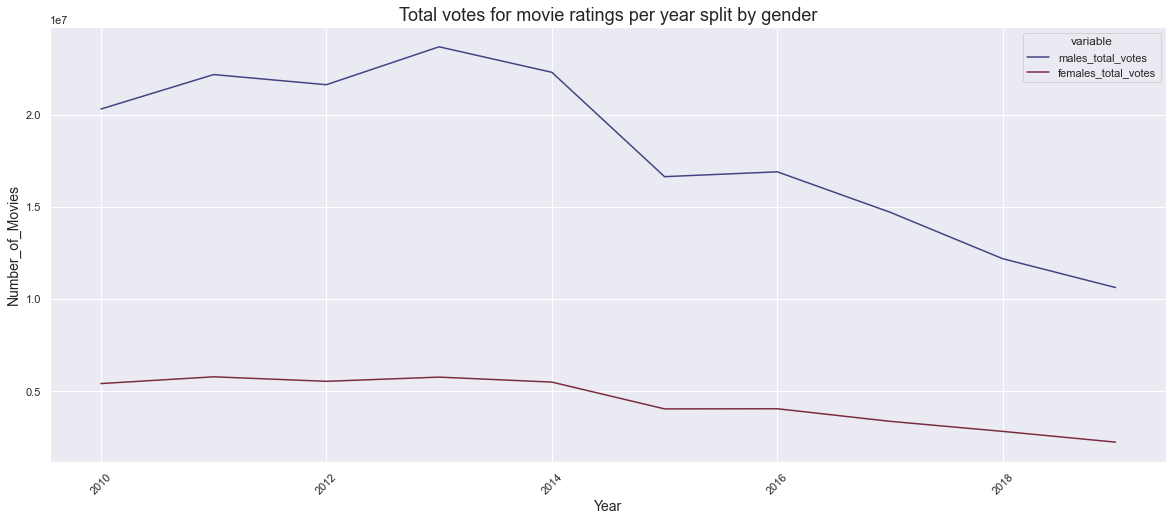

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(20, 8))
categorical = pd.melt(df_male_female_t,id_vars='year')
sns.lineplot(x="year", y="value", hue="variable", data=categorical, palette='icefire')



plt.xticks(rotation=45)

plt.xlabel('Year', size = 14)
plt.ylabel('Number_of_Movies', size = 14)
plt.title('Total votes for movie ratings per year split by gender', size = 18)
plt.show()
plt.savefig("Total votes for movie ratings per year split by gender.jpg")

In [25]:
df_male_female_g = movies_ratings[movies_ratings.year >= 2010]
df_male_female_g = df_male_female_g[df_male_female_g.year < 2020] #excludes 2020 
df_male_female_g = df_male_female_g[['year','genre', 'males_allages_votes', 'females_allages_votes']].groupby(['year','genre']).sum().reset_index()
df_male_female_g = df_male_female_g.rename(columns={'males_allages_votes':'males_total_votes'})
df_male_female_g = df_male_female_g.rename(columns={'females_allages_votes':'females_total_votes'})
df_male_female_g 

,year,genre,males_total_votes,females_total_votes
0,2010,Action,20963.0,1134.0
1,2010,"Action, Adventure",3575.0,369.0
2,2010,"Action, Adventure, Biography",383.0,43.0
3,2010,"Action, Adventure, Comedy",135936.0,28837.0
4,2010,"Action, Adventure, Crime",199604.0,59129.0
...,...,...,...,...
2971,2019,"Sci-Fi, Thriller",3933.0,684.0
2972,2019,Sport,792.0,129.0
2973,2019,Thriller,28452.0,7003.0
2974,2019,War,642.0,94.0


In [26]:
df_male_female_gen_x = movies_ratings[movies_ratings.year >= 2010]
df_male_female_gen_x = df_male_female_gen_x[df_male_female_gen_x.year < 2020] #excludes 2020
df_male_female_gen_x = df_male_female_gen_x[['year','title', 'males_45age_votes', 'females_45age_votes']].groupby(['year']).sum().reset_index()
df_male_female_gen_x = df_male_female_gen_x.rename(columns={'males_45age_votes':'males_generation_x_votes'})
df_male_female_gen_x = df_male_female_gen_x.rename(columns={'females_45age_votes':'females_generation_x_votes'})
df_male_female_gen_x

,year,males_generation_x_votes,females_generation_x_votes
0,2010,2648696.0,508667.0
1,2011,2960250.0,582714.0
2,2012,2835241.0,563358.0
3,2013,3055031.0,585679.0
4,2014,2866358.0,551124.0
5,2015,2314625.0,438371.0
6,2016,2318279.0,430629.0
7,2017,2107799.0,394723.0
8,2018,1822236.0,348302.0
9,2019,1524841.0,282486.0


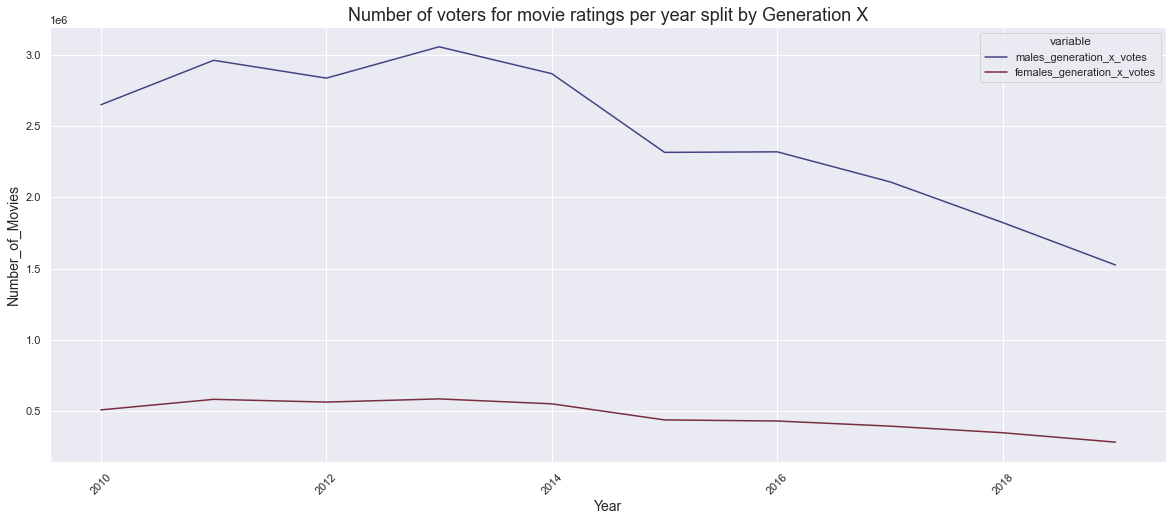

<Figure size 432x288 with 0 Axes>

In [27]:
plt.figure(figsize=(20, 8))
categorical = pd.melt(df_male_female_gen_x,id_vars='year')
sns.lineplot(x="year", y="value", hue="variable", data=categorical, palette='icefire')

plt.xticks(rotation=45)

plt.xlabel('Year', size = 14)
plt.ylabel('Number_of_Movies', size = 14)
plt.title('Number of voters for movie ratings per year split by Generation X', size = 18)
plt.show()
plt.savefig("Voters for movie ratings per year split by gen_x.jpg");

In [28]:
df_male_female_mill = movies_ratings[movies_ratings.year >= 2010]
df_male_female_mill = df_male_female_mill[df_male_female_mill.year < 2020] #excludes 2020
df_male_female_mill = df_male_female_mill[['year','title', 'males_30age_votes', 'females_30age_votes']].groupby(['year']).sum().reset_index()
df_male_female_mill = df_male_female_mill.rename(columns={'males_30age_votes':'males_millennials_votes'})
df_male_female_mill = df_male_female_mill.rename(columns={'females_30age_votes':'females_millennials_votes'})
df_male_female_mill

,year,males_millennials_votes,females_millennials_votes
0,2010,11462677.0,2643562.0
1,2011,12373034.0,2856863.0
2,2012,11522392.0,2576852.0
3,2013,12239258.0,2612719.0
4,2014,11120582.0,2398250.0
5,2015,8293223.0,1787644.0
6,2016,8220870.0,1727711.0
7,2017,7022786.0,1425441.0
8,2018,5748438.0,1171426.0
9,2019,4999823.0,946339.0


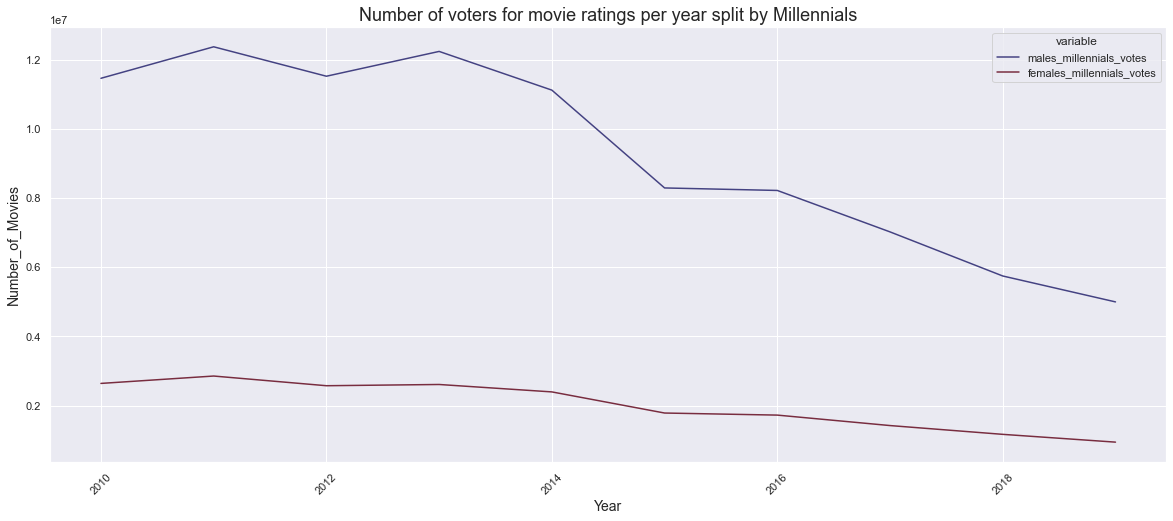

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(20, 8))
categorical = pd.melt(df_male_female_mill,id_vars='year')
sns.lineplot(x="year", y="value", hue="variable", data=categorical, palette='icefire')

plt.xticks(rotation=45)

plt.xlabel('Year', size = 14)
plt.ylabel('Number_of_Movies', size = 14)
plt.title('Number of voters for movie ratings per year split by Millennials', size = 18)
plt.show()
plt.savefig("Voters for movie ratings per year split by mill.jpg")

In [30]:
df_male_female_gen_z = movies_ratings[movies_ratings.year >= 2010]
df_male_female_gen_z = df_male_female_gen_z[df_male_female_gen_z.year < 2020] #excludes 2020
df_male_female_gen_z = df_male_female_gen_z[['year','title', 'males_18age_votes', 'females_18age_votes']].groupby(['year']).sum().reset_index()
df_male_female_gen_z = df_male_female_gen_z.rename(columns={'males_18age_votes':'males_generation_z_votes'})
df_male_female_gen_z = df_male_female_gen_z.rename(columns={'females_18age_votes':'females_generation_z_votes'})
df_male_female_gen_z

,year,males_generation_z_votes,females_generation_z_votes
0,2010,5213251.0,1969087.0
1,2011,5738887.0,2020880.0
2,2012,5874978.0,1986853.0
3,2013,6649546.0,2085746.0
4,2014,6550683.0,2069082.0
5,2015,4711739.0,1459769.0
6,2016,4757694.0,1451250.0
7,2017,4099071.0,1176593.0
8,2018,3318267.0,973358.0
9,2019,2963887.0,762292.0


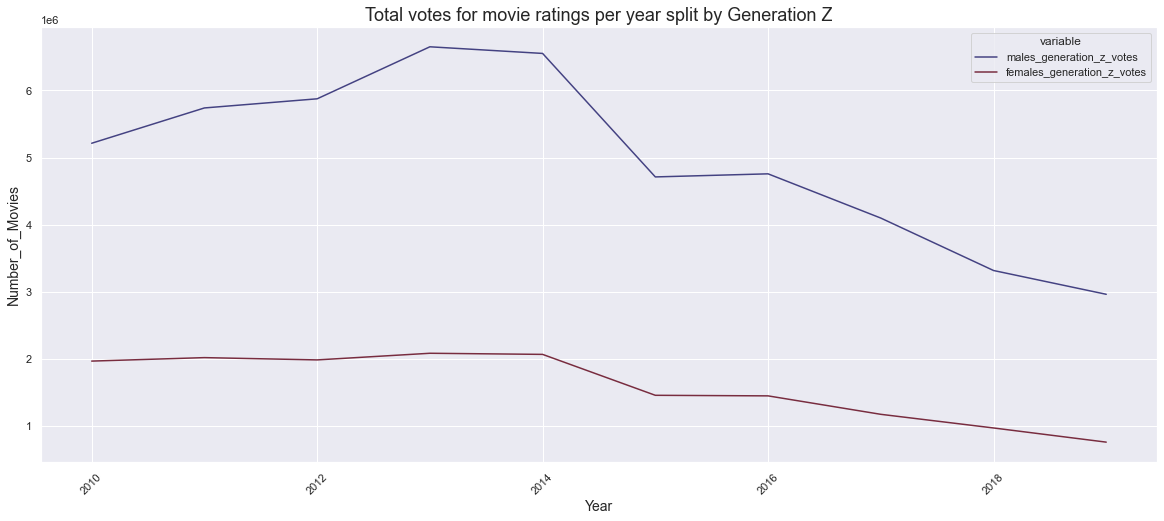

<Figure size 432x288 with 0 Axes>

In [31]:
plt.figure(figsize=(20, 8))
categorical = pd.melt(df_male_female_gen_z,id_vars='year')
sns.lineplot(x="year", y="value", hue="variable", data=categorical, palette='icefire')



plt.xticks(rotation=45)

plt.xlabel('Year', size = 14)
plt.ylabel('Number_of_Movies', size = 14)
plt.title('Total votes for movie ratings per year split by Generation Z', size = 18)
plt.show()
plt.savefig("Total votes for movie ratings per year split by generation z.jpg")

In [32]:
df_reviews2010 = movies_ratings[movies_ratings.year >= 2010]
df_reviews2010 = df_reviews2010
df_reviews2010

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
15675,tt0069049,L'altra faccia del vento,The Other Side of the Wind,2018,2018-11-02,Drama,122,"France, Iran, USA","English, German",Orson Welles,...,6.1,117.0,5.5,62.0,5.9,190.0,6.9,1349.0,6.7,2504.0
25479,tt0100275,La Telenovela Errante,La Telenovela Errante,2017,2018-09-06,"Comedy, Drama, Fantasy",80,Chile,Spanish,"Raoul Ruiz, Valeria Sarmiento",...,6.6,11.0,5.0,1.0,6.0,27.0,6.7,23.0,6.5,142.0
32465,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,2018-03-20,"Animation, Adventure, Comedy",83,Canada,English,Anthony Harrison,...,9.0,23.0,9.5,22.0,6.0,4.0,9.1,148.0,8.9,52.0
33030,tt0146592,Pál Adrienn,Pál Adrienn,2010,2011-03-17,Drama,136,"Hungary, France, Austria, Netherlands",Hungarian,Ágnes Kocsis,...,7.2,52.0,6.2,17.0,4.7,7.0,5.4,7.0,6.7,367.0
33800,tt0162942,A zöld sárkány gyermekei,A zöld sárkány gyermekei,2010,2011-04-07,Drama,89,Hungary,"Hungarian, Mandarin, Chinese",Bence Miklauzic,...,6.5,14.0,8.0,2.0,7.0,1.0,6.7,3.0,6.9,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,5.7,11.0,5.0,2.0,5.5,12.0,6.3,22.0,5.3,214.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,8.0,47.0,7.3,30.0,7.0,6.0,6.8,13.0,7.7,388.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,2.0
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,NaN,NaN,7.0,1.0,4.0,3.0,1.7,5.0,5.8,5.0


In [33]:

df_reviews2010['budget'] = df_reviews2010['budget'].str.split(' ', expand = True)[1]
df_reviews2010.dropna(inplace=True) 
df_reviews2010

<ipython-input-33-412731868a98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews2010['budget'] = df_reviews2010['budget'].str.split(' ', expand = True)[1]
<ipython-input-33-412731868a98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews2010.dropna(inplace=True)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
42535,tt0337692,On the Road,On the Road,2012,2012-10-11,"Adventure, Drama, Romance",124,"France, USA, UK, Mexico, Canada, Brazil, Germa...","English, French",Walter Salles,...,6.0,4758.0,5.9,773.0,5.4,311.0,5.8,4562.0,6.1,22167.0
43351,tt0359950,I sogni segreti di Walter Mitty,The Secret Life of Walter Mitty,2013,2013-12-19,"Comedy, Drama, Fantasy",114,"USA, UK","English, Spanish, Icelandic",Ben Stiller,...,7.4,22245.0,7.3,4069.0,6.6,568.0,7.4,32078.0,7.3,135753.0
43614,tt0365907,La preda perfetta,A Walk Among the Tombstones,2014,2014-09-18,"Action, Crime, Drama",114,USA,"English, Spanish, Urdu, Russian",Scott Frank,...,6.4,5506.0,6.7,1739.0,6.5,491.0,6.6,13170.0,6.5,54677.0
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,7.2,32243.0,7.3,6381.0,6.8,762.0,7.1,72876.0,6.8,217418.0
44111,tt0376136,The Rum Diary - Cronache di una passione,The Rum Diary,2011,2012-04-24,"Comedy, Drama",119,"USA, UK","English, Spanish, German",Bruce Robinson,...,6.0,9967.0,6.1,1627.0,5.6,426.0,6.1,14133.0,6.2,54085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85266,tt9208444,Impractical Jokers: The Movie,Impractical Jokers: The Movie,2020,2020-02-28,Comedy,92,USA,English,Chris Henchy,...,6.7,131.0,6.0,51.0,4.7,62.0,6.2,1213.0,5.4,888.0
85274,tt9214832,Emma.,Emma.,2020,2020-03-27,"Comedy, Drama",124,UK,English,Autumn de Wilde,...,6.9,2313.0,6.8,708.0,6.1,170.0,6.9,2954.0,6.6,7433.0
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",...,5.9,835.0,6.2,230.0,5.1,130.0,6.0,1985.0,5.9,5945.0
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,...,7.4,517.0,7.3,78.0,6.3,107.0,7.4,1456.0,7.4,5942.0


In [34]:
df_reviews2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1921 entries, 42535 to 85740
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              1921 non-null   object 
 1   title                      1921 non-null   object 
 2   original_title             1921 non-null   object 
 3   year                       1921 non-null   int32  
 4   date_published             1921 non-null   object 
 5   genre                      1921 non-null   object 
 6   duration                   1921 non-null   int64  
 7   country                    1921 non-null   object 
 8   language                   1921 non-null   object 
 9   director                   1921 non-null   object 
 10  writer                     1921 non-null   object 
 11  production_company         1921 non-null   object 
 12  actors                     1921 non-null   object 
 13  description                1921 non-null   

In [35]:
df_reviews2010.iloc[:10]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
42535,tt0337692,On the Road,On the Road,2012,2012-10-11,"Adventure, Drama, Romance",124,"France, USA, UK, Mexico, Canada, Brazil, Germa...","English, French",Walter Salles,...,6.0,4758.0,5.9,773.0,5.4,311.0,5.8,4562.0,6.1,22167.0
43351,tt0359950,I sogni segreti di Walter Mitty,The Secret Life of Walter Mitty,2013,2013-12-19,"Comedy, Drama, Fantasy",114,"USA, UK","English, Spanish, Icelandic",Ben Stiller,...,7.4,22245.0,7.3,4069.0,6.6,568.0,7.4,32078.0,7.3,135753.0
43614,tt0365907,La preda perfetta,A Walk Among the Tombstones,2014,2014-09-18,"Action, Crime, Drama",114,USA,"English, Spanish, Urdu, Russian",Scott Frank,...,6.4,5506.0,6.7,1739.0,6.5,491.0,6.6,13170.0,6.5,54677.0
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,7.2,32243.0,7.3,6381.0,6.8,762.0,7.1,72876.0,6.8,217418.0
44111,tt0376136,The Rum Diary - Cronache di una passione,The Rum Diary,2011,2012-04-24,"Comedy, Drama",119,"USA, UK","English, Spanish, German",Bruce Robinson,...,6.0,9967.0,6.1,1627.0,5.6,426.0,6.1,14133.0,6.2,54085.0
44206,tt0377981,Gnomeo & Giulietta,Gnomeo & Juliet,2011,2011-03-16,"Animation, Adventure, Comedy",84,"UK, USA, Canada","English, Japanese, Spanish, German",Kelly Asbury,...,6.2,7471.0,6.3,1272.0,5.5,323.0,5.9,9561.0,5.9,24122.0
44487,tt0383010,I tre marmittoni,The Three Stooges,2012,2012-06-27,"Comedy, Family",92,USA,English,"Bobby Farrelly, Peter Farrelly",...,4.6,1275.0,5.5,587.0,4.7,305.0,5.4,8289.0,4.8,11686.0
44619,tt0385887,Motherless Brooklyn - I segreti di una città,Motherless Brooklyn,2019,2019-11-07,"Crime, Drama, Mystery",144,USA,"English, French",Edward Norton,...,6.8,1632.0,7.1,837.0,6.3,269.0,6.8,5124.0,6.8,14796.0
45080,tt0398286,Rapunzel: L'intreccio della torre,Tangled,2010,2010-11-26,"Animation, Adventure, Comedy",100,USA,English,"Nathan Greno, Byron Howard",...,8.0,46033.0,7.9,5963.0,7.2,624.0,7.8,55470.0,7.7,168153.0
45218,tt0401729,John Carter,John Carter,2012,2012-03-07,"Action, Adventure, Sci-Fi",132,USA,English,Andrew Stanton,...,6.6,13964.0,6.9,4170.0,6.3,625.0,6.6,37437.0,6.5,121291.0


In [36]:
df_reviews2010
df_reviews2010.sort_values(by = 'budget', ascending=False)
df_reviews2010 = df_reviews2010.rename(columns={'males_allages_votes':'males_allages_votes'})
df_reviews2010 = df_reviews2010.rename(columns={'females_allages_votes':'females_allages_votes'})
df_reviews2010

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
42535,tt0337692,On the Road,On the Road,2012,2012-10-11,"Adventure, Drama, Romance",124,"France, USA, UK, Mexico, Canada, Brazil, Germa...","English, French",Walter Salles,...,6.0,4758.0,5.9,773.0,5.4,311.0,5.8,4562.0,6.1,22167.0
43351,tt0359950,I sogni segreti di Walter Mitty,The Secret Life of Walter Mitty,2013,2013-12-19,"Comedy, Drama, Fantasy",114,"USA, UK","English, Spanish, Icelandic",Ben Stiller,...,7.4,22245.0,7.3,4069.0,6.6,568.0,7.4,32078.0,7.3,135753.0
43614,tt0365907,La preda perfetta,A Walk Among the Tombstones,2014,2014-09-18,"Action, Crime, Drama",114,USA,"English, Spanish, Urdu, Russian",Scott Frank,...,6.4,5506.0,6.7,1739.0,6.5,491.0,6.6,13170.0,6.5,54677.0
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,7.2,32243.0,7.3,6381.0,6.8,762.0,7.1,72876.0,6.8,217418.0
44111,tt0376136,The Rum Diary - Cronache di una passione,The Rum Diary,2011,2012-04-24,"Comedy, Drama",119,"USA, UK","English, Spanish, German",Bruce Robinson,...,6.0,9967.0,6.1,1627.0,5.6,426.0,6.1,14133.0,6.2,54085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85266,tt9208444,Impractical Jokers: The Movie,Impractical Jokers: The Movie,2020,2020-02-28,Comedy,92,USA,English,Chris Henchy,...,6.7,131.0,6.0,51.0,4.7,62.0,6.2,1213.0,5.4,888.0
85274,tt9214832,Emma.,Emma.,2020,2020-03-27,"Comedy, Drama",124,UK,English,Autumn de Wilde,...,6.9,2313.0,6.8,708.0,6.1,170.0,6.9,2954.0,6.6,7433.0
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",...,5.9,835.0,6.2,230.0,5.1,130.0,6.0,1985.0,5.9,5945.0
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,...,7.4,517.0,7.3,78.0,6.3,107.0,7.4,1456.0,7.4,5942.0


In [37]:
df_reviews2010_10 = df_reviews2010[['genre','budget','worlwide_gross_income','males_allages_votes', 
                                      'females_allages_votes']].groupby(['worlwide_gross_income','budget','genre']).sum().reset_index()
df_reviews2010_10.iloc[:10]

,worlwide_gross_income,budget,genre,males_allages_votes,females_allages_votes
0,$ 100014025,30000000,"Action, Thriller",106270.0,21507.0
1,$ 100129872,12000000,"Biography, Comedy, Drama",54686.0,22359.0
2,$ 100375432,20000000,"Comedy, Romance",24360.0,12530.0
3,$ 100502638,5000000,"Comedy, Drama",16434.0,6112.0
4,$ 100541806,58000000,"Horror, Sci-Fi, Thriller",128686.0,22715.0
5,$ 100654149,28000000,"Comedy, Family",22971.0,8484.0
6,$ 1009888,2700000,"Action, Thriller",2331.0,196.0
7,$ 101134059,60000000,"Biography, Drama",64899.0,30337.0
8,$ 10116816,12000000,"Biography, Crime, Drama",11240.0,2798.0
9,$ 10117966,35000000,"Crime, Drama, Thriller",30008.0,5793.0


<Figure size 1080x1152 with 0 Axes>

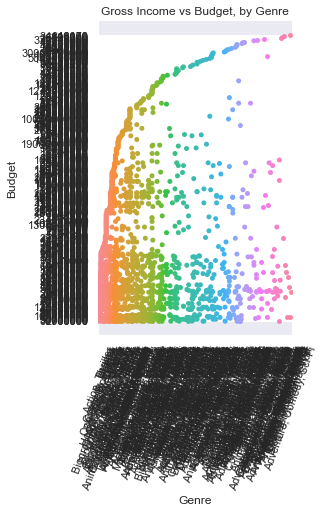

In [38]:
plt.figure(figsize=(15,16))
sns.catplot(x="genre", y="budget", data=df_reviews2010_10)
plt.xticks(rotation= 70)

plt.title('Gross Income vs Budget, by Genre');
plt.ylabel('Budget')
plt.xlabel('Genre')
plt.show()

In [50]:
df_reviews2010_z = df_reviews2010
df_reviews2010_z.sort_values(by = 'budget', ascending=False)
df_reviews2010_z = df_reviews2010_z.rename(columns={'males_18age_votes':'males_generation_z_votes'})
df_reviews2010_z = df_reviews2010_z.rename(columns={'females_18age_votes':'females_generation_z_votes'})
df_reviews2010_z

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
42535,tt0337692,On the Road,On the Road,2012,2012-10-11,"Adventure, Drama, Romance",124,"France, USA, UK, Mexico, Canada, Brazil, Germa...","English, French",Walter Salles,...,6.0,4758.0,5.9,773.0,5.4,311.0,5.8,4562.0,6.1,22167.0
43351,tt0359950,I sogni segreti di Walter Mitty,The Secret Life of Walter Mitty,2013,2013-12-19,"Comedy, Drama, Fantasy",114,"USA, UK","English, Spanish, Icelandic",Ben Stiller,...,7.4,22245.0,7.3,4069.0,6.6,568.0,7.4,32078.0,7.3,135753.0
43614,tt0365907,La preda perfetta,A Walk Among the Tombstones,2014,2014-09-18,"Action, Crime, Drama",114,USA,"English, Spanish, Urdu, Russian",Scott Frank,...,6.4,5506.0,6.7,1739.0,6.5,491.0,6.6,13170.0,6.5,54677.0
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,7.2,32243.0,7.3,6381.0,6.8,762.0,7.1,72876.0,6.8,217418.0
44111,tt0376136,The Rum Diary - Cronache di una passione,The Rum Diary,2011,2012-04-24,"Comedy, Drama",119,"USA, UK","English, Spanish, German",Bruce Robinson,...,6.0,9967.0,6.1,1627.0,5.6,426.0,6.1,14133.0,6.2,54085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85266,tt9208444,Impractical Jokers: The Movie,Impractical Jokers: The Movie,2020,2020-02-28,Comedy,92,USA,English,Chris Henchy,...,6.7,131.0,6.0,51.0,4.7,62.0,6.2,1213.0,5.4,888.0
85274,tt9214832,Emma.,Emma.,2020,2020-03-27,"Comedy, Drama",124,UK,English,Autumn de Wilde,...,6.9,2313.0,6.8,708.0,6.1,170.0,6.9,2954.0,6.6,7433.0
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",...,5.9,835.0,6.2,230.0,5.1,130.0,6.0,1985.0,5.9,5945.0
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,...,7.4,517.0,7.3,78.0,6.3,107.0,7.4,1456.0,7.4,5942.0


In [51]:
df_reviews2010_zz = df_reviews2010_z[['genre','budget','worlwide_gross_income','males_generation_z_votes', 
                                      'females_generation_z_votes']].groupby(['worlwide_gross_income','budget','genre']).sum().reset_index()
df_reviews2010_zz.iloc[:10]

,worlwide_gross_income,budget,genre,males_generation_z_votes,females_generation_z_votes
0,$ 100014025,30000000,"Action, Thriller",24218.0,7044.0
1,$ 100129872,12000000,"Biography, Comedy, Drama",11351.0,5704.0
2,$ 100375432,20000000,"Comedy, Romance",5335.0,3790.0
3,$ 100502638,5000000,"Comedy, Drama",3516.0,1913.0
4,$ 100541806,58000000,"Horror, Sci-Fi, Thriller",30965.0,7114.0
5,$ 100654149,28000000,"Comedy, Family",6240.0,3166.0
6,$ 1009888,2700000,"Action, Thriller",186.0,33.0
7,$ 101134059,60000000,"Biography, Drama",16340.0,11017.0
8,$ 10116816,12000000,"Biography, Crime, Drama",2193.0,641.0
9,$ 10117966,35000000,"Crime, Drama, Thriller",5016.0,1403.0


In [41]:
df_reviews2010_m = df_reviews2010
df_reviews2010_m.sort_values(by = 'budget', ascending=False)
df_reviews2010_m = df_reviews2010_m.rename(columns={'males_30age_votes':'males_millennials_votes'})
df_reviews2010_m = df_reviews2010_m.rename(columns={'females_30age_votes':'females_millennials_votes'})
df_reviews2010_m

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_millennials_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
42535,tt0337692,On the Road,On the Road,2012,2012-10-11,"Adventure, Drama, Romance",124,"France, USA, UK, Mexico, Canada, Brazil, Germa...","English, French",Walter Salles,...,6.0,4758.0,5.9,773.0,5.4,311.0,5.8,4562.0,6.1,22167.0
43351,tt0359950,I sogni segreti di Walter Mitty,The Secret Life of Walter Mitty,2013,2013-12-19,"Comedy, Drama, Fantasy",114,"USA, UK","English, Spanish, Icelandic",Ben Stiller,...,7.4,22245.0,7.3,4069.0,6.6,568.0,7.4,32078.0,7.3,135753.0
43614,tt0365907,La preda perfetta,A Walk Among the Tombstones,2014,2014-09-18,"Action, Crime, Drama",114,USA,"English, Spanish, Urdu, Russian",Scott Frank,...,6.4,5506.0,6.7,1739.0,6.5,491.0,6.6,13170.0,6.5,54677.0
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,7.2,32243.0,7.3,6381.0,6.8,762.0,7.1,72876.0,6.8,217418.0
44111,tt0376136,The Rum Diary - Cronache di una passione,The Rum Diary,2011,2012-04-24,"Comedy, Drama",119,"USA, UK","English, Spanish, German",Bruce Robinson,...,6.0,9967.0,6.1,1627.0,5.6,426.0,6.1,14133.0,6.2,54085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85266,tt9208444,Impractical Jokers: The Movie,Impractical Jokers: The Movie,2020,2020-02-28,Comedy,92,USA,English,Chris Henchy,...,6.7,131.0,6.0,51.0,4.7,62.0,6.2,1213.0,5.4,888.0
85274,tt9214832,Emma.,Emma.,2020,2020-03-27,"Comedy, Drama",124,UK,English,Autumn de Wilde,...,6.9,2313.0,6.8,708.0,6.1,170.0,6.9,2954.0,6.6,7433.0
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",...,5.9,835.0,6.2,230.0,5.1,130.0,6.0,1985.0,5.9,5945.0
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,...,7.4,517.0,7.3,78.0,6.3,107.0,7.4,1456.0,7.4,5942.0


In [52]:
df_reviews2010_mm = df_reviews2010_m[['genre','budget','worlwide_gross_income','males_millennials_votes', 
                                      'females_millennials_votes']].groupby(['worlwide_gross_income','budget','genre']).sum().reset_index()
df_reviews2010_mm

,worlwide_gross_income,budget,genre,males_millennials_votes,females_millennials_votes
0,$ 100014025,30000000,"Action, Thriller",54191.0,9712.0
1,$ 100129872,12000000,"Biography, Comedy, Drama",28270.0,11021.0
2,$ 100375432,20000000,"Comedy, Romance",12582.0,5737.0
3,$ 100502638,5000000,"Comedy, Drama",8767.0,2869.0
4,$ 100541806,58000000,"Horror, Sci-Fi, Thriller",68126.0,10818.0
...,...,...,...,...,...
1916,$ 99357138,25000000,"Drama, Mystery, Romance",16978.0,16041.0
1917,$ 99557032,1500000,"Horror, Mystery, Thriller",85368.0,21537.0
1918,$ 99775678,53000000,"Biography, Crime, Drama",57499.0,7341.0
1919,$ 99783556,50000000,"Animation, Adventure, Comedy",17693.0,6840.0


In [54]:
df_reviews2010_mm = df_reviews2010_m[['genre','budget','worlwide_gross_income','males_millennials_votes', 
                                      'females_millennials_votes']].groupby(['worlwide_gross_income','budget','genre']).sum().reset_index()
df_reviews2010_mm.iloc[:10]

,worlwide_gross_income,budget,genre,males_millennials_votes,females_millennials_votes
0,$ 100014025,30000000,"Action, Thriller",54191.0,9712.0
1,$ 100129872,12000000,"Biography, Comedy, Drama",28270.0,11021.0
2,$ 100375432,20000000,"Comedy, Romance",12582.0,5737.0
3,$ 100502638,5000000,"Comedy, Drama",8767.0,2869.0
4,$ 100541806,58000000,"Horror, Sci-Fi, Thriller",68126.0,10818.0
5,$ 100654149,28000000,"Comedy, Family",11696.0,3721.0
6,$ 1009888,2700000,"Action, Thriller",1038.0,77.0
7,$ 101134059,60000000,"Biography, Drama",33273.0,13669.0
8,$ 10116816,12000000,"Biography, Crime, Drama",5541.0,1196.0
9,$ 10117966,35000000,"Crime, Drama, Thriller",18270.0,3268.0


In [43]:
df_reviews2010_x = df_reviews2010
df_reviews2010_x.sort_values(by = 'budget', ascending=False)
df_reviews2010_x = df_reviews2010_x.rename(columns={'males_45age_votes':'males_generation_x_votes'})
df_reviews2010_x = df_reviews2010_x.rename(columns={'females_45age_votes':'females_generation_x_votes'})
df_reviews2010_x

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_generation_x_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
42535,tt0337692,On the Road,On the Road,2012,2012-10-11,"Adventure, Drama, Romance",124,"France, USA, UK, Mexico, Canada, Brazil, Germa...","English, French",Walter Salles,...,6.0,4758.0,5.9,773.0,5.4,311.0,5.8,4562.0,6.1,22167.0
43351,tt0359950,I sogni segreti di Walter Mitty,The Secret Life of Walter Mitty,2013,2013-12-19,"Comedy, Drama, Fantasy",114,"USA, UK","English, Spanish, Icelandic",Ben Stiller,...,7.4,22245.0,7.3,4069.0,6.6,568.0,7.4,32078.0,7.3,135753.0
43614,tt0365907,La preda perfetta,A Walk Among the Tombstones,2014,2014-09-18,"Action, Crime, Drama",114,USA,"English, Spanish, Urdu, Russian",Scott Frank,...,6.4,5506.0,6.7,1739.0,6.5,491.0,6.6,13170.0,6.5,54677.0
43822,tt0369610,Jurassic World,Jurassic World,2015,2015-06-11,"Action, Adventure, Sci-Fi",124,USA,English,Colin Trevorrow,...,7.2,32243.0,7.3,6381.0,6.8,762.0,7.1,72876.0,6.8,217418.0
44111,tt0376136,The Rum Diary - Cronache di una passione,The Rum Diary,2011,2012-04-24,"Comedy, Drama",119,"USA, UK","English, Spanish, German",Bruce Robinson,...,6.0,9967.0,6.1,1627.0,5.6,426.0,6.1,14133.0,6.2,54085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85266,tt9208444,Impractical Jokers: The Movie,Impractical Jokers: The Movie,2020,2020-02-28,Comedy,92,USA,English,Chris Henchy,...,6.7,131.0,6.0,51.0,4.7,62.0,6.2,1213.0,5.4,888.0
85274,tt9214832,Emma.,Emma.,2020,2020-03-27,"Comedy, Drama",124,UK,English,Autumn de Wilde,...,6.9,2313.0,6.8,708.0,6.1,170.0,6.9,2954.0,6.6,7433.0
85397,tt9354944,Jexi,Jexi,2019,2019-10-11,"Comedy, Romance",84,"USA, Canada",English,"Jon Lucas, Scott Moore",...,5.9,835.0,6.2,230.0,5.1,130.0,6.0,1985.0,5.9,5945.0
85460,tt9426210,Weathering with You,Tenki no ko,2019,2019-10-14,"Animation, Drama, Family",112,"Japan, China",Japanese,Makoto Shinkai,...,7.4,517.0,7.3,78.0,6.3,107.0,7.4,1456.0,7.4,5942.0


In [53]:
df_reviews2010_xx = df_reviews2010_x[['genre','budget','worlwide_gross_income','males_generation_x_votes', 
                                      'females_generation_x_votes']].groupby(['worlwide_gross_income','budget','genre']).sum().reset_index()
df_reviews2010_xx

,worlwide_gross_income,budget,genre,males_generation_x_votes,females_generation_x_votes
0,$ 100014025,30000000,"Action, Thriller",18638.0,2577.0
1,$ 100129872,12000000,"Biography, Comedy, Drama",12115.0,4113.0
2,$ 100375432,20000000,"Comedy, Romance",4426.0,1744.0
3,$ 100502638,5000000,"Comedy, Drama",2422.0,598.0
4,$ 100541806,58000000,"Horror, Sci-Fi, Thriller",18113.0,2460.0
...,...,...,...,...,...
1916,$ 99357138,25000000,"Drama, Mystery, Romance",4243.0,2397.0
1917,$ 99557032,1500000,"Horror, Mystery, Thriller",16126.0,3840.0
1918,$ 99775678,53000000,"Biography, Crime, Drama",14338.0,2066.0
1919,$ 99783556,50000000,"Animation, Adventure, Comedy",4387.0,1130.0


In [55]:
df_reviews2010_xx = df_reviews2010_x[['genre','budget','worlwide_gross_income','males_generation_x_votes', 
                                      'females_generation_x_votes']].groupby(['worlwide_gross_income','budget','genre']).sum().reset_index()
df_reviews2010_xx.iloc[:10]

,worlwide_gross_income,budget,genre,males_generation_x_votes,females_generation_x_votes
0,$ 100014025,30000000,"Action, Thriller",18638.0,2577.0
1,$ 100129872,12000000,"Biography, Comedy, Drama",12115.0,4113.0
2,$ 100375432,20000000,"Comedy, Romance",4426.0,1744.0
3,$ 100502638,5000000,"Comedy, Drama",2422.0,598.0
4,$ 100541806,58000000,"Horror, Sci-Fi, Thriller",18113.0,2460.0
5,$ 100654149,28000000,"Comedy, Family",3417.0,795.0
6,$ 1009888,2700000,"Action, Thriller",908.0,68.0
7,$ 101134059,60000000,"Biography, Drama",10420.0,2942.0
8,$ 10116816,12000000,"Biography, Crime, Drama",2667.0,695.0
9,$ 10117966,35000000,"Crime, Drama, Thriller",5569.0,839.0


***
## Top 10 Locations

Next, I wanted to find out the top 10 locations where most movies are produced around the world. As expected, I can see that USA, India 
and the UK have the most votes.  However, USA lead the pack by any overwhelming 75%.

***

In [45]:
df_movies_countries = movies_ratings[['country','title']].groupby(['country']).count().reset_index().rename(columns={'title':'number_of_movies'})
df_movies_countries = df_movies_countries.sort_values(by='number_of_movies', ascending=False)

In [46]:
df_movies_countries = movies_ratings[['country','title']].groupby(['country']).count().reset_index().rename(columns={'title':'number_of_movies'})
df_movies_countries = df_movies_countries.sort_values(by='number_of_movies', ascending=False)
df_movies_countries = df_movies_countries.iloc[:10]
df_movies_countries

,country,number_of_movies
4285,USA,28511
2064,India,6065
3887,UK,4111
2486,Japan,3077
1116,France,3055
2279,Italy,2444
462,Canada,1802
1615,Germany,1396
3829,Turkey,1351
1924,Hong Kong,1239


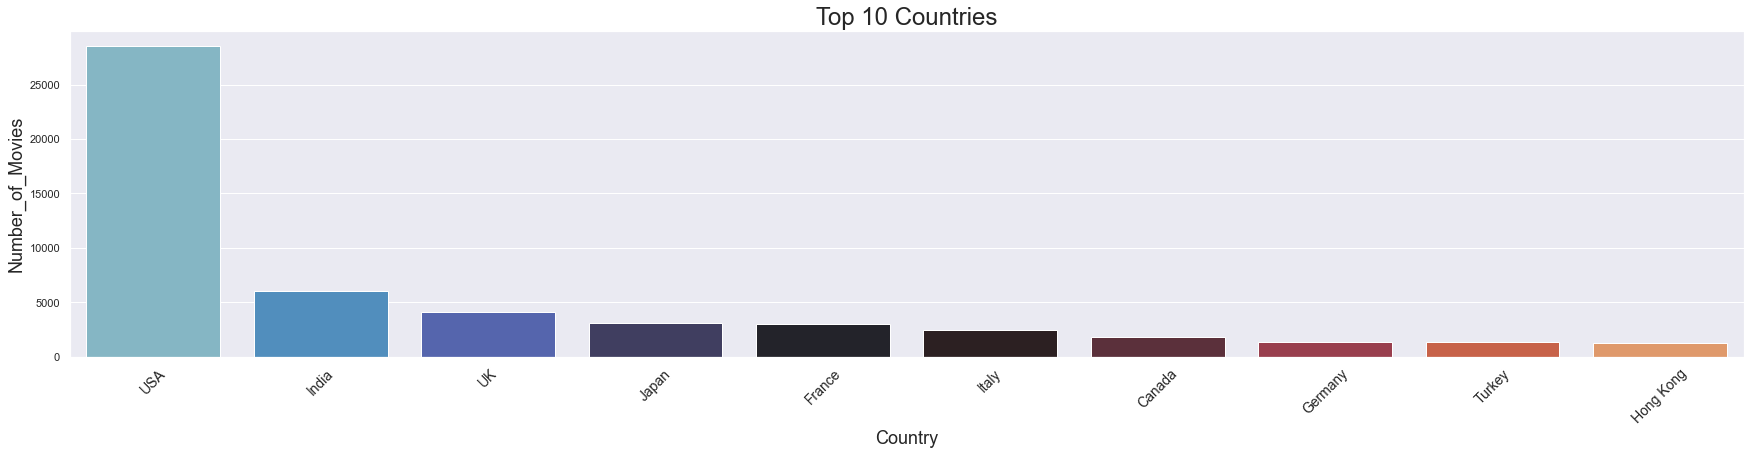

<Figure size 432x288 with 0 Axes>

In [47]:
fig, ax = plt.subplots(figsize=(30, 6))

sns.barplot(x = df_movies_countries['country'],
            y = df_movies_countries['number_of_movies'], palette='icefire',)
           

plt.xticks(size=14, rotation=45)

plt.xlabel('Country', size = 18)
plt.ylabel('Number_of_Movies', size = 18)
plt.title('Top 10 Countries', size = 24)
plt.show()
plt.savefig("Top 10 Countries.jpg")

***
## Top 10 Production Companies

And finally, I took a look at the top 10 companies with most movies produced in the world. Metro-Goldwyn Mayer(MGM) came in the lead with Warner Bros on their heals .  These companies out produced the other top 10 production companies. While Columbia and Paramount just about produced the same amount of movies over the last 10 years.

***

In [48]:
df_production_companies = movies_ratings[['production_company','title']].groupby(['production_company']).count().reset_index().rename(columns={'title':'number_of_movies'})
df_production_companies = df_production_companies.sort_values(by='number_of_movies', ascending=False)
df_production_companies = df_production_companies.iloc[:10]
df_production_companies

,production_company,number_of_movies
20924,Metro-Goldwyn-Mayer (MGM),1284
31109,Warner Bros.,1153
8288,Columbia Pictures,914
23502,Paramount Pictures,903
30128,Twentieth Century Fox,865
30401,Universal Pictures,732
24990,RKO Radio Pictures,535
21524,Mosfilm,279
30397,Universal International Pictures (UI),272
6485,Canal+,231


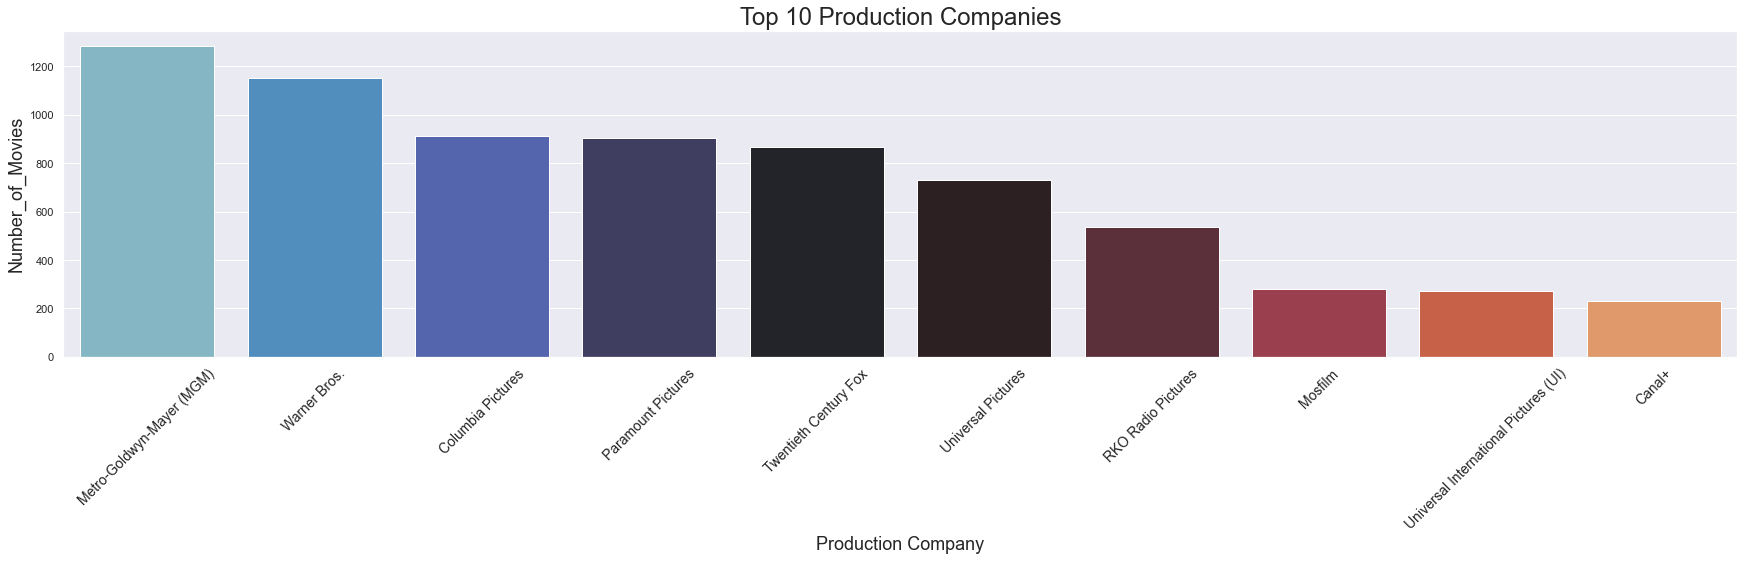

<Figure size 432x288 with 0 Axes>

In [49]:
fig, ax = plt.subplots(figsize=(30, 6))

sns.barplot(x = 'production_company',
            y = 'number_of_movies',
            data = df_production_companies, palette='icefire')

plt.xticks(size=14, rotation=45)

plt.xlabel('Production Company', size = 18)
plt.ylabel('Number_of_Movies', size = 18)
plt.title('Top 10 Production Companies', size = 24)
plt.show()
plt.savefig("Top 10 Production Companies.jpg")
plt.show()


***
## In Conclusion
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***